In [1]:
import pandas as pd

1.Import the dataset and explore basic info (nulls, data types).

In [70]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [71]:
print("Shape:",df.shape)

Shape: (891, 12)


In [72]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


2.Handle missing values using mean/median/imputation

In [73]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [74]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Cabin"]=df["Cabin"].fillna("No cabin")
df["Embarked"]=df["Embarked"].fillna("NAN")

In [75]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [76]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


3.Convert categorical features into numerical using encoding

In [77]:
#male->0 and female->1
df['Sex']=df['Sex'].map({'male': 0, 'female': 1})

In [78]:
#Embarked c->drop,s->1,q->0
df['Embarked']=df['Embarked'].fillna("S")
df=pd.get_dummies(df,columns=['Embarked'], drop_first=True)

In [79]:
df=df.drop(['Name','Ticket','Cabin'],axis=1)

In [81]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,False,True
887,888,1,1,1,19.0,0,0,30.0000,False,True
888,889,0,3,1,NaN,1,2,23.4500,False,True
889,890,1,1,0,26.0,0,0,30.0000,False,False


4.Normalize/standardize the numerical features.

In [82]:
from sklearn.preprocessing import StandardScaler

In [85]:
numeric_cols = ['Age','Fare','SibSp','Parch']

In [87]:
scaler=StandardScaler()
df[numeric_cols]=scaler.fit_transform(df[numeric_cols])

In [88]:
print(df[numeric_cols].describe())

                Age          Fare         SibSp         Parch
count  7.140000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.388379e-16  3.987333e-18  4.386066e-17  5.382900e-17
std    1.000701e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.016979e+00 -6.484217e-01 -4.745452e-01 -4.736736e-01
25%   -6.595416e-01 -4.891482e-01 -4.745452e-01 -4.736736e-01
50%   -1.170488e-01 -3.573909e-01 -4.745452e-01 -4.736736e-01
75%    5.718310e-01 -2.424635e-02  4.327934e-01 -4.736736e-01
max    3.465126e+00  9.667167e+00  6.784163e+00  6.974147e+00


In [89]:
print(df[numeric_cols])

          Age      Fare     SibSp     Parch
0   -0.530377 -0.502445  0.432793 -0.473674
1    0.571831  0.786845  0.432793 -0.473674
2   -0.254825 -0.488854 -0.474545 -0.473674
3    0.365167  0.420730  0.432793 -0.473674
4    0.365167 -0.486337 -0.474545 -0.473674
..        ...       ...       ...       ...
886 -0.185937 -0.386671 -0.474545 -0.473674
887 -0.737041 -0.044381 -0.474545 -0.473674
888       NaN -0.176263  0.432793  2.008933
889 -0.254825 -0.044381 -0.474545 -0.473674
890  0.158503 -0.492378 -0.474545 -0.473674

[891 rows x 4 columns]


In [90]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,-0.530377,0.432793,-0.473674,-0.502445,False,True
1,2,1,1,1,0.571831,0.432793,-0.473674,0.786845,False,False
2,3,1,3,1,-0.254825,-0.474545,-0.473674,-0.488854,False,True
3,4,1,1,1,0.365167,0.432793,-0.473674,0.420730,False,True
4,5,0,3,0,0.365167,-0.474545,-0.473674,-0.486337,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,-0.185937,-0.474545,-0.473674,-0.386671,False,True
887,888,1,1,1,-0.737041,-0.474545,-0.473674,-0.044381,False,True
888,889,0,3,1,NaN,0.432793,2.008933,-0.176263,False,True
889,890,1,1,0,-0.254825,-0.474545,-0.473674,-0.044381,False,False


5.Visualize outliers using boxplots and remove them.

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

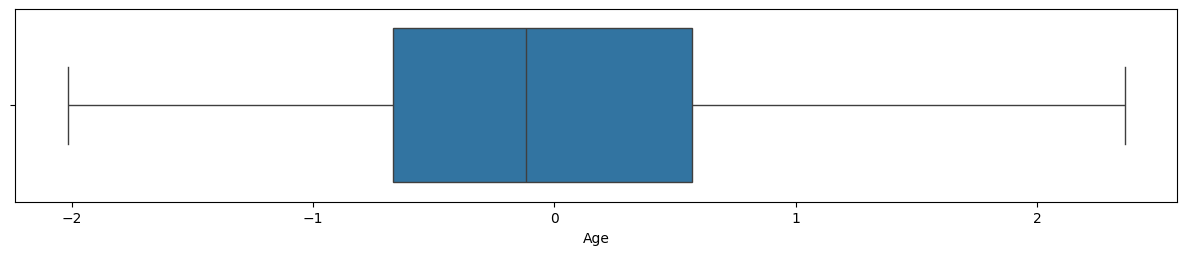

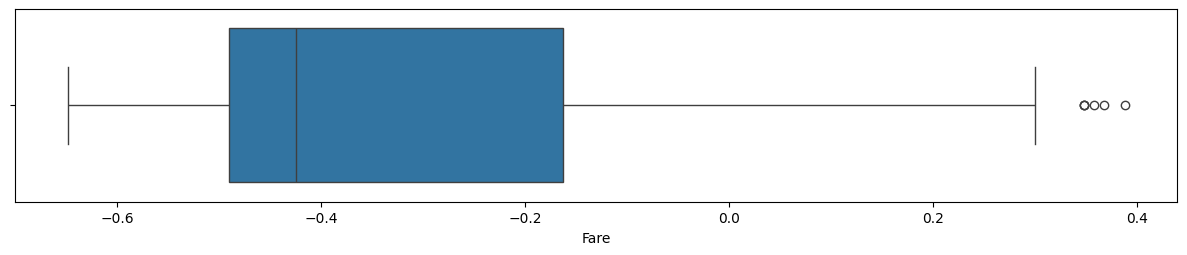

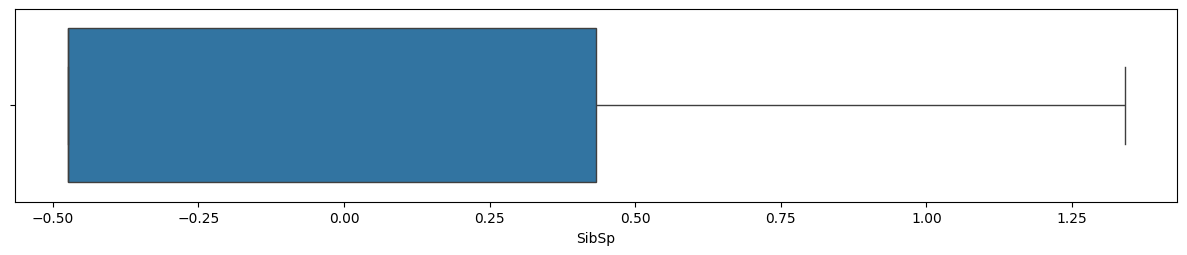

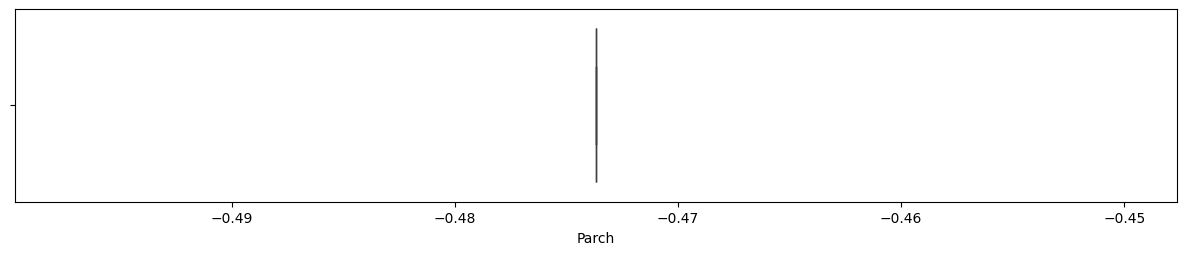

In [103]:
for i in numeric_cols:
    plt.figure(figsize=(15, 2.5))
    sns.boxplot(x=df[i])
    plt.show()
df_original = df.copy()

In [104]:
def remove_outliers(df, column):
    q1=df[numeric_cols].quantile(0.25)  # 25% value
    q2=df[numeric_cols].quantile(0.75)  # 75% value
    IQR=q2-q1  # Range between q1 and q2
    # Only keep values within this range
    low=q1-1.5*IQR
    up=q2+1.5*IQR
    return df[(df[numeric_cols]>=low) & (df[numeric_cols]<=up)]

In [100]:
for i in numeric_cols:
    df=remove_outliers(df, i)

In [101]:
print("Data shape after removing outliers:", df.shape)

Data shape after removing outliers: (891, 10)
